In [ ]:
import pandas as pd
import numpy as np
from missingpy import MissForest

In [ ]:
myopia = pd.read_sas('C:/Users/Desktop/data mining/Myopia/myopiaf2d.sas7bdat', encoding = 'latin-1')
myopia.head()

In [ ]:
imputer = MissForest()
X = myopia.drop(['fastpn', 'fcasechg'], axis=1)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed_db= pd.DataFrame(X_imputed,columns=X.columns)
X_imputed_db.head()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = myopia['fastpn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_db, y, stratify=y, test_size=0.3)

X_train.head()

In [10]:
#Add GridsearchCV and other evaluation index like roc, auc etc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
#import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
 y.value_counts()

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [11]:
# Perform gridsearch
# scoring="precision" is used based on unbalance of response(25:75)

param_range_rfc = {
    'max_depth': [5, 10, 20, 100],
    'n_estimators': [100, 200, 300],
    }
gscv_rfc = GridSearchCV(RandomForestClassifier(), param_range_rfc, cv=4)

In [12]:
gscv_rfc.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [13]:
clf2 = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=0)
clf2.fit(X_train, y_train)

print("Train accuracy: {:.3}".format(clf2.score(X_train, y_train)))
print("Test accuracy: {:.3}".format(clf2.score(X_test, y_test)))

Train accuracy: 1.0
Test accuracy: 0.774


In [14]:
y_pred_train=clf2.predict(X_train)
y_pred_test=clf2.predict(X_test)

print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75        26
         1.0       0.84      0.75      0.79        36

    accuracy                           0.77        62
   macro avg       0.77      0.78      0.77        62
weighted avg       0.78      0.77      0.78        62



In [15]:
print(confusion_matrix(y_test,y_pred_test))

[[21  5]
 [ 9 27]]


In [16]:
print(confusion_matrix(y_train,y_pred_train))

[[60  0]
 [ 0 82]]


In [17]:
import matplotlib.pyplot as plt

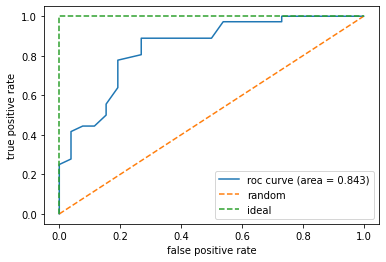

In [18]:
Y2_score = clf2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y2_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [20]:
col=X.columns
importance=pd.DataFrame(clf2.feature_importances_,index=col,columns=['val'])
sort_importance=importance.sort_values(by="val",ascending=False)
importance_10=sort_importance.head(10)

Text(0.5, 0, 'Feature importance')

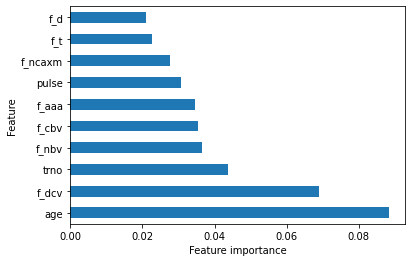

In [21]:
n_features=X.shape[1]
ax=importance_10.plot.barh(legend=False)
ax.set_ylabel('Feature')
ax.set_xlabel('Feature importance')

In [22]:
import eli5
eli5.show_weights(clf2, top=-1, feature_names = X_test.columns.tolist())

C:\Users\wei.feng\python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0885 ± 0.1868,age
0.0690 ± 0.1536,f_dcv
0.0439 ± 0.1086,trno
0.0365 ± 0.1124,f_nbv
0.0355 ± 0.1050,f_cbv
0.0347 ± 0.0985,f_aaa
0.0307 ± 0.0894,pulse
0.0278 ± 0.0887,f_ncaxm
0.0226 ± 0.0666,f_t
0.0211 ± 0.0633,f_d


In [23]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay

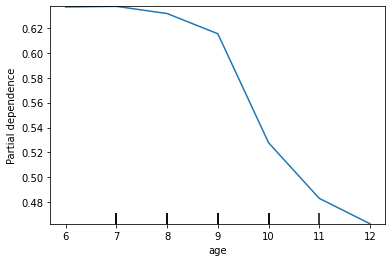

In [24]:
features=['age']
plot_partial_dependence(clf2,X_train,features=features)

In [25]:
pd.crosstab(myopia["fastpn"],myopia["age"],margins=True)

age,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,All
fastpn,,,,,,,,,
0.0,1,3,9,14,20,22,16,1,86
1.0,13,17,40,28,14,5,1,0,118
All,14,20,49,42,34,27,17,1,204


In [26]:
pd.crosstab(myopia["fastpn"],myopia["age"],margins=True,normalize="columns")

age,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,All
fastpn,,,,,,,,,
0.0,0.071429,0.15,0.183673,0.333333,0.588235,0.814815,0.941176,1.0,0.421569
1.0,0.928571,0.85,0.816327,0.666667,0.411765,0.185185,0.058824,0.0,0.578431


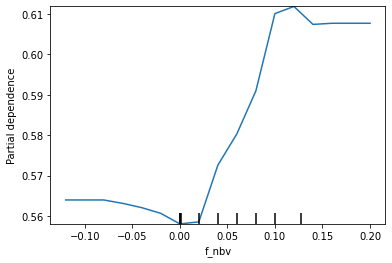

In [27]:
#non cycloplegic best corrected VA
features=['f_nbv']
plot_partial_dependence(clf2,X_train,features=features)

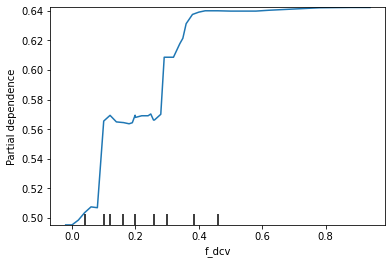

In [28]:
#Distance best corrected VA
features=['f_dcv']
plot_partial_dependence(clf2,X_train,features=features)

In [14]:
#Add GridsearchCV and other evaluation index like roc, auc etc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
param_range_rfc = {
    'max_depth': [5, 10, 20, 100],
    'n_estimators': [100, 200, 300],
    }
gscv_rfc = GridSearchCV(RandomForestRegressor(), param_range_rfc, cv=4)

In [17]:
gscv_rfc.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [18]:
clf = RandomForestRegressor(max_depth=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

print("Train accuracy: {:.3}".format(clf.score(X_train, y_train)))
print("Test accuracy: {:.3}".format(clf.score(X_test, y_test)))

Train accuracy: 0.883
Test accuracy: 0.381


<ipython-input-58-dd3bdfe0e8f5>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot: >

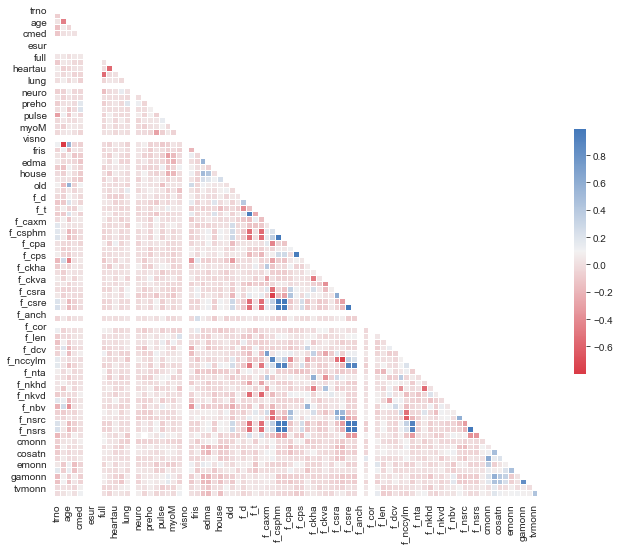

In [58]:
# library imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = myopia.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)